#CUSTOMER SEGMENTATION PROJECT

Objective: Performing unsupervised learning technique's clustering of data on a dataset of customers records from groceries firm.
We will be doing customer segmentation.
Customer segmentation is a process of seperating customers into different classes/groups based on some similarities among customers.
For optimizing the significance of each customers with respect to the business, we will be dividing customers into segments.
this will help the business to modify products according to customer's needs & behaviours.

***IMPORTING LIBRARIES***

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("marketing_campaign.csv",sep="\t")

In [4]:
len(df)

2240

In [5]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1]:
#there are missing values in income attribute.
#Dt_Customer attribute should have been datetime dtype, but it is object dtype here.
#there are few object dtypes in the dataset, so we need to convert them into numerical datatypes.

missing values- since there are only 24 missing values in a column of 2240 rows we will simply drop the missing values as the small amount wont affect much difference.

In [7]:
df=df.dropna()

In [8]:
print("length of dataset after dropping NAN values:",len(df))

length of dataset after dropping NAN values: 2216


In [9]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [10]:
df.Dt_Customer.dtype

dtype('<M8[ns]')

In [11]:
dates=[]
for i in df["Dt_Customer"]:
    i=i.date()
    dates.append(i)

In [12]:
print("dates of newest customers enrolment:",max(dates))
print("dates of oldest customers enrolment:",min(dates))

dates of newest customers enrolment: 2014-12-06
dates of oldest customers enrolment: 2012-01-08


In [2]:
#creating a feature for no. of days  customer started shopping in store with respect to last record in date database.

In [13]:
days=[]
d1=max(dates) #assuming for newest customer
for i in dates:
    dnew=d1-i
    days.append(dnew)
df["Customer_Days"]=days
df["Customer_Days"]=pd.to_numeric(df["Customer_Days"],errors="coerce")

In [14]:
df.Customer_Days

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_Days, Length: 2216, dtype: int64

since Dt_Customer feature which was object dtype got handled, we will now explore remaining two categorical features i.e:"Marital_Status" and "Education"

In [15]:
print("categories in Marital_Status attribute:\n", df["Marital_Status"].value_counts(),"\n")
print("categories inEducation attribute:\n",df["Education"].value_counts())

categories in Marital_Status attribute:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

categories inEducation attribute:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


#FEATURE ENGINEERING

In [3]:
#extracting age of customers

In [16]:
df["Age"]=2023-df["Year_Birth"]

In [4]:
#total spendings

In [17]:
df["Spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [5]:
#observing marital status for assuming lifestyle scenarios

In [18]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd":"Alone","Widow":"Alone",
                                               "YOLO":"Alone","Divorced":"Alone","Single":"Alone"})

In [6]:
#total children living with

In [19]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [7]:
#total no. of  family members in household

In [20]:
df["Family_Size"]=df["Living_With"].replace({"Alone":1,"Partner":2})+df["Children"]

In [8]:
#parenthood

In [21]:
df["Is_Parent"]=np.where(df["Children"]>0,1,0)

In [9]:
#educational qualification segmentation

In [22]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate",
                                         "Master":"Postgraduate","PhD":"Postgraduate"})

In [10]:
#simplifying names of columns

In [23]:
df=df.rename(columns={"MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish",
                      "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [11]:
#dropping unwanted attributes

In [24]:
for_drop=["Marital_Status","Dt_Customer","Z_CostContact","Z_Revenue","Year_Birth","ID"]
df=df.drop(for_drop,axis=1)

In [12]:
#quicklook of stats of dataset with updated features

In [25]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_Days  \
count   2216.000000   2216.000000  2216.000000  2216.000000   2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271   4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417   2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000   0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000   2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000   4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000   5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000   9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

as we can see, the mean value above of Income and Age attributes as well as max value of those two attributes show some illogical numbers.
we have to plot some features to get a broader viewpoint of data.

plot for selected features: data subset


<Figure size 800x550 with 0 Axes>

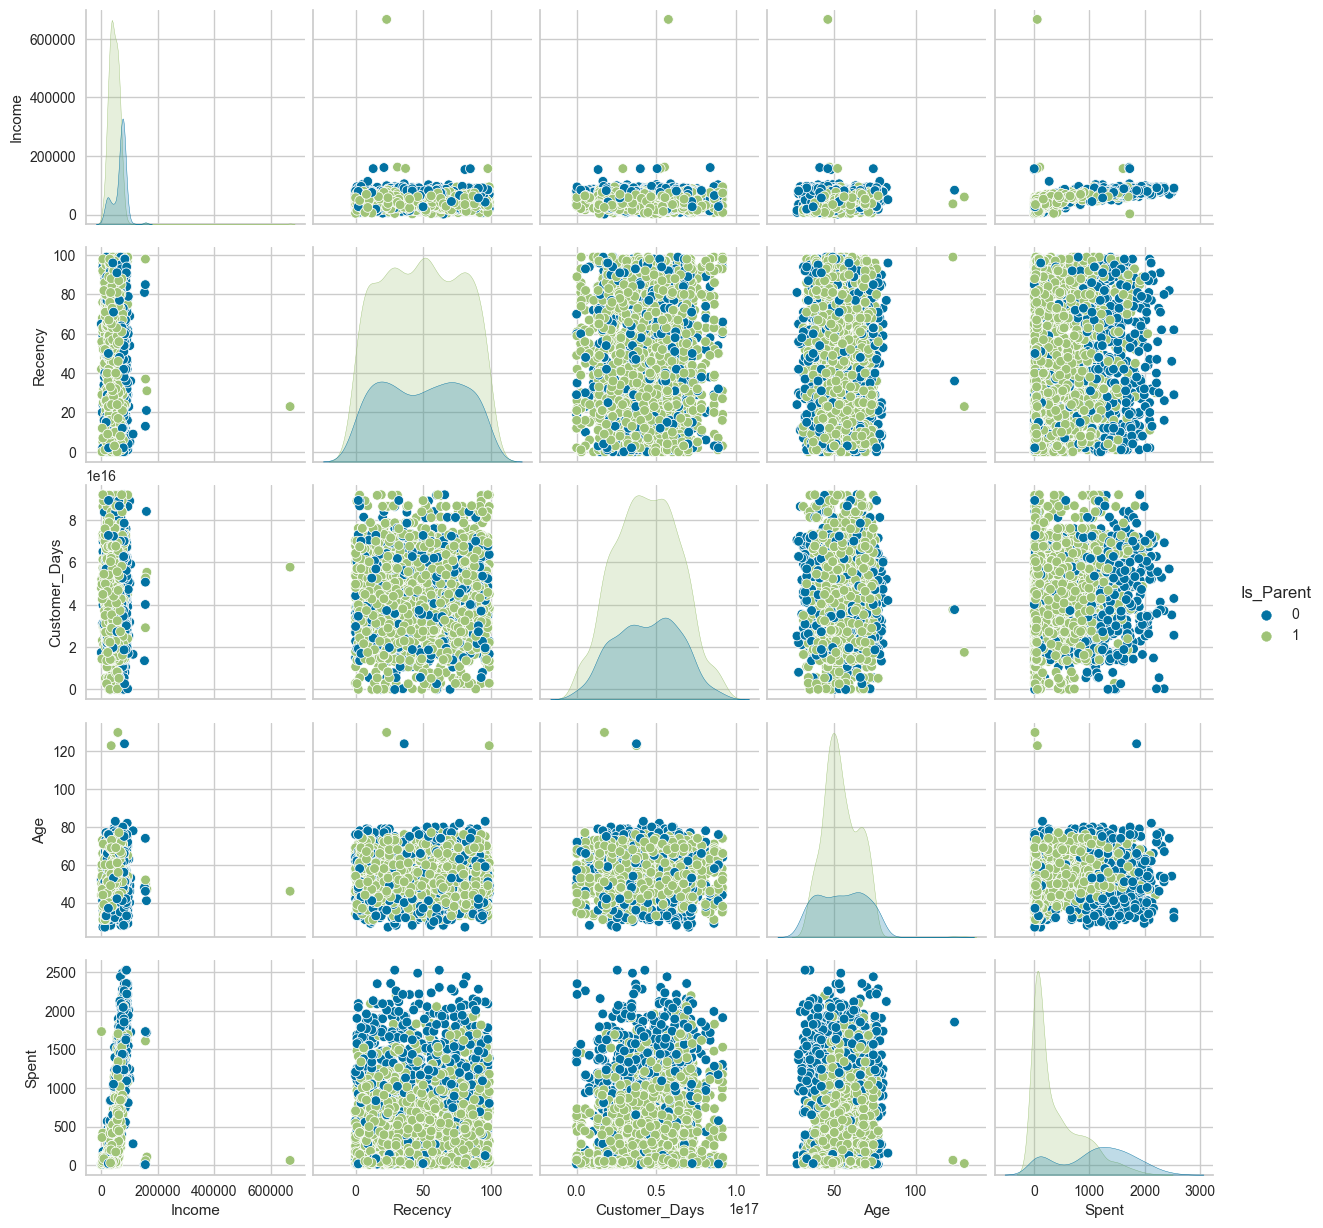

In [26]:
Plot_cols=["Income","Recency","Customer_Days","Age","Spent","Is_Parent"]
print("plot for selected features: data subset")
plt.figure()
sns.pairplot(df[Plot_cols], hue="Is_Parent")
plt.show()

In [39]:
#there are few outliers that can be seen in Age and Income attributes
#we will drop those outliers.

In [27]:
df=df[(df["Age"]<90)]
df=df[(df["Income"]<600000)]

In [28]:
df.shape[0]

2212

In [13]:
#correlation of numerical features

<Axes: >

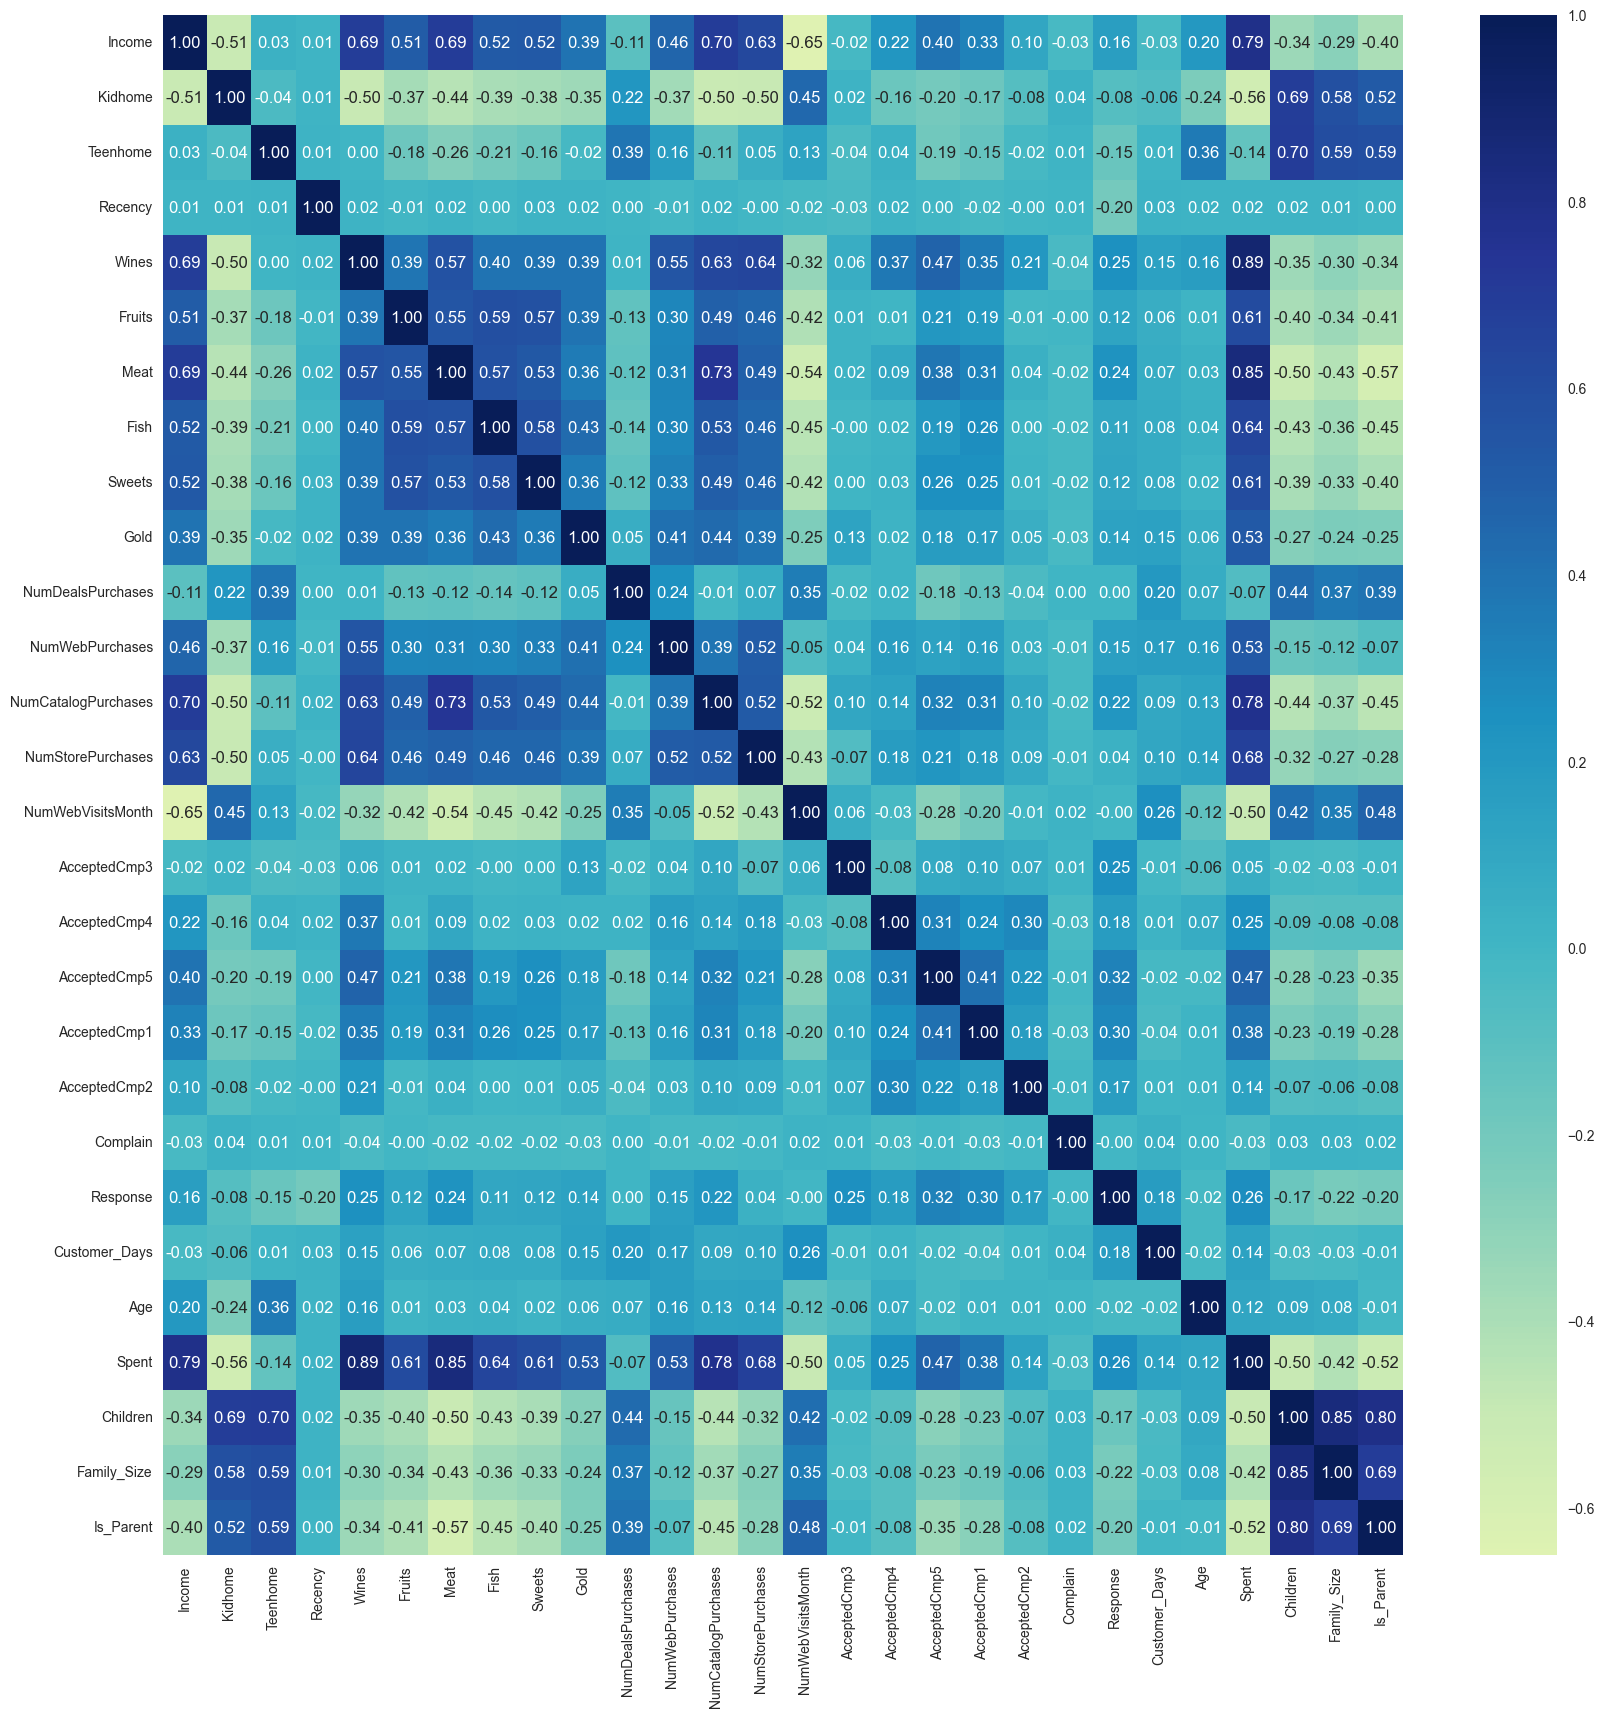

In [29]:
cormatrix=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormatrix, annot=True, cmap="YlGnBu", center=0, fmt=".2f")

#preprocessing data to perform clustering

In [14]:
#label encoding categorical features

In [30]:
s=(df.dtypes=="object")


In [37]:
obj_cols=list(s[s].index)
print("categorical variables:",obj_cols)

categorical variables: ['Education', 'Living_With']


In [15]:
#label encoding categorical variables

In [38]:
Le=LabelEncoder()
for i in obj_cols:
    df[i]=df[[i]].apply(Le.fit_transform)

all features are now numerical

In [16]:
#creating a subset of dataset by dropping features on deals accepted to perform scaling on remaining features.

In [39]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Days',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [40]:
copy_df=df.copy()
cols_to_del=["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response"]
copy_df=copy_df.drop(cols_to_del,axis=1)

In [17]:
#scaling using StandardScaler

In [41]:
scaler=StandardScaler()
scaler.fit(copy_df)
scaled_copy_df=pd.DataFrame(scaler.transform(copy_df),columns=copy_df.columns)

we have now all features scaled.
now this scaled dataset can be used in dimensionality reduction.

In [42]:
scaled_copy_df.head(10)

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
5   0.571657  0.490381 -0.822754  0.908097 -1.141097  0.636663  0.394373   
6  -0.893586  0.170807 -0.822754  0.908097 -0.519047 -0.208416  0.973207   
7   0.571657 -0.859793  1.040021 -0.929699 -0.588164 -0.679881 -0.410961   
8   0.571657 -1.003968  1.040021 -0.929699 -1.037422 -0.863722 -0.662628   
9   0.571657 -2.151748  1.040021  0.908097  0.655937 -0.822210 -0.662628   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   
5 -0.307889 -0.687527  0.363993  ...             0.453643           1.290224   
6 -0.013514  0.225554  0.534385  ...             0.111982           0.367205   
7 -0.495218 -0.632742 -0.634019  ...            -0.913000          -0.555814   
8 -0.637946 -0.632742 -0.585335  ...            -0.913000          -1.171160   
9 -0.718230 -0.669265 -0.634019  ...            -0.913000          -1.786506   

   NumWebVisitsMonth  Customer_Days       Age     Spent  Living_With  \
0           0.692181       1.973583  1.018352  1.676245    -1.349603   
1          -0.132545      -1.665144  1.274785 -0.963297    -1.349603   
2          -0.544908      -0.172664  0.334530  0.280110     0.740959   
3           0.279818      -1.923210 -1.289547 -0.920135     0.740959   
4          -0.132545      -0.822130 -1.033114 -0.307562     0.740959   
5           0.279818      -0.254385  0.163575  0.180505     0.740959   
6           0.279818       1.035944 -0.178336 -0.028667    -1.349603   
7           1.104543      -0.103847 -1.375024 -0.727564     0.740959   
8           1.516906       0.154219 -0.434769 -0.931755     0.740959   
9           6.052898      -1.050088  1.616696 -0.926775     0.740959   

   Children  Family_Size  Is_Parent  
0 -1.264598    -1.758359  -1.581139  
1  1.404572     0.449070   0.632456  
2 -1.264598    -0.654644  -1.581139  
3  0.069987     0.449070   0.632456  
4  0.069987     0.449070   0.632456  
5  0.069987     0.449070   0.632456  
6  0.069987    -0.654644   0.632456  
7  0.069987     0.449070   0.632456  
8  0.069987     0.449070   0.632456  
9  1.404572     1.552784   0.632456  

[10 rows x 23 columns]

#DIMENSIONALITY REDUCTION

dimensionality reduction is a task which projects the data onto a lower dimensional space by reducing the number of random variables with consideration, and retaining only principal features.
we have made a copy of the dataset by dropping/reducing certain features so as the less no. of features will make it easy to work with. 
many features are redundant because they are correlated which leads to decreased efficiency of model's performance, that is why we will be performing dimensionality reduction so that eventually we can put them through classifier.

In [18]:
#dimensionality reduction with PCA

PCA(Principal Component Analysis) is a dimensionality reduction method used for reducing dimenionality of big datasets by removing large collections of variables and the remaining features will be retained with majority of information.

In [43]:
pca=PCA(n_components=3)
pca.fit(scaled_copy_df)
PCA_df=pd.DataFrame(pca.transform(scaled_copy_df),columns=(["col1","col2","col3"]))

In [44]:
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  1.284887e-17  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0 -1.284887e-17  1.706839 -4.312147 -1.328295 -0.158117  1.242298   
col3  2212.0  4.898633e-17  1.221955 -3.529354 -0.829456 -0.021403  0.799791   

           max  
col1  7.444305  
col2  6.142592  
col3  6.614026

In [19]:
#3D visualization of reduced dimension

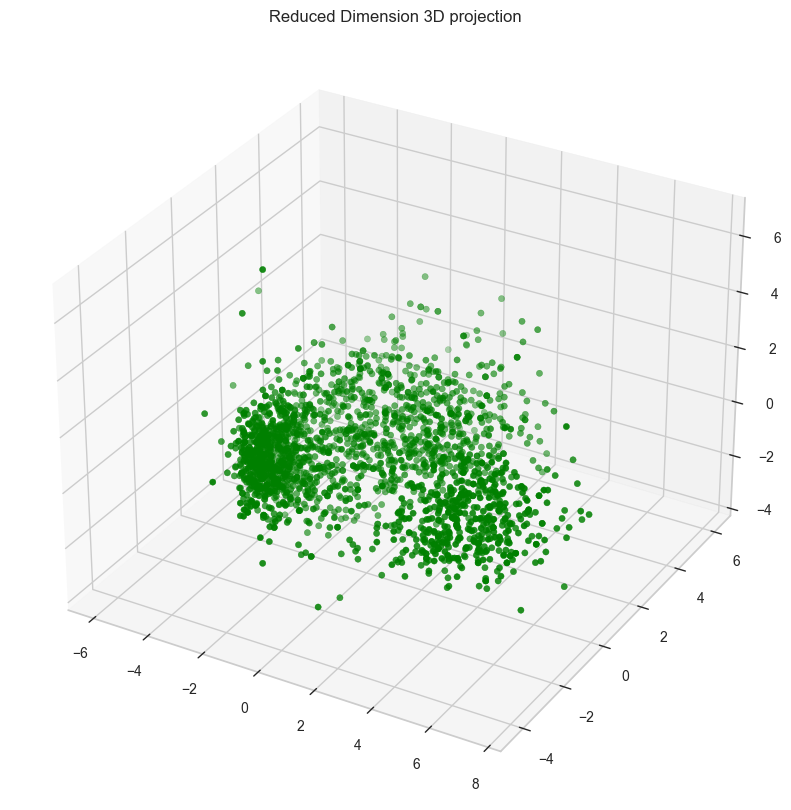

In [46]:
x=PCA_df["col1"]
y=PCA_df["col2"]
z=PCA_df["col3"]
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z, c="green", marker="o")
ax.set_title("Reduced Dimension 3D projection")
plt.show()

#CLUSTERING

***Agglomerative clustering :
it is technique of hierarchical clustering algorithm, that divides the data into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

In [20]:
#elbow method to find optimal number of clusters

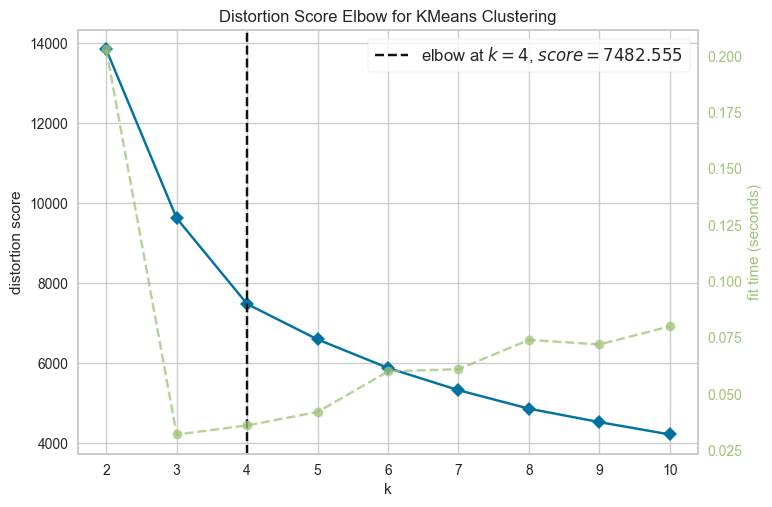

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(PCA_df)
elbow.show()

the elbow graph shows optimal number of clusters =4 for this data.

In [21]:
#fitting agglomerative clustering model

In [48]:
ag=AgglomerativeClustering(n_clusters=4)
fitt_ag=ag.fit_predict(PCA_df)
PCA_df["clusters"]=fitt_ag

In [22]:
#adding clusters attribute to original dataset

In [49]:
df["clusters"]=fitt_ag

In [23]:
#3D distribution of clusters

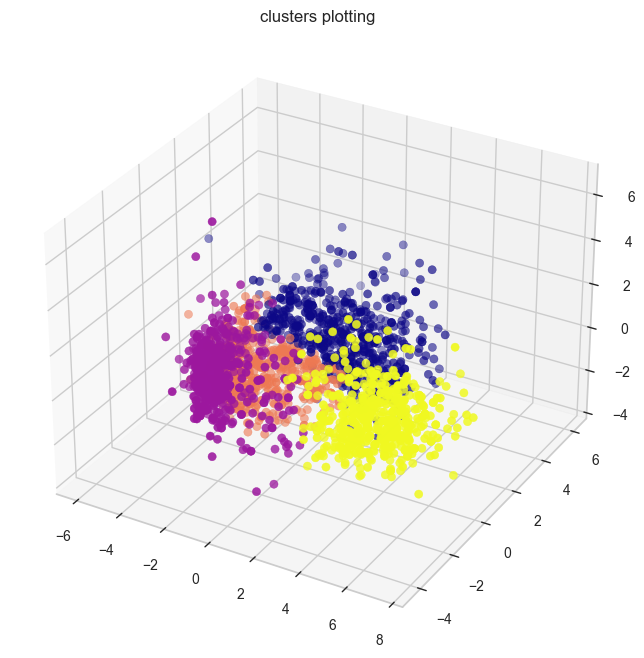

In [52]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection="3d")
ax.scatter(x,y,z, c=PCA_df["clusters"], s=35, marker="o", cmap="plasma")
ax.set_title("clusters plotting")
plt.show()

#MODEL EVALUATION

In [24]:
#unlike supervised learning we cannot score this unsupervised model since theres no tagged feature to apply scoring.
#but we will be analysing patterns of our cluster to get some insight of its nature.

In [25]:
# plotting of group distribution of clusters in the form of countplot

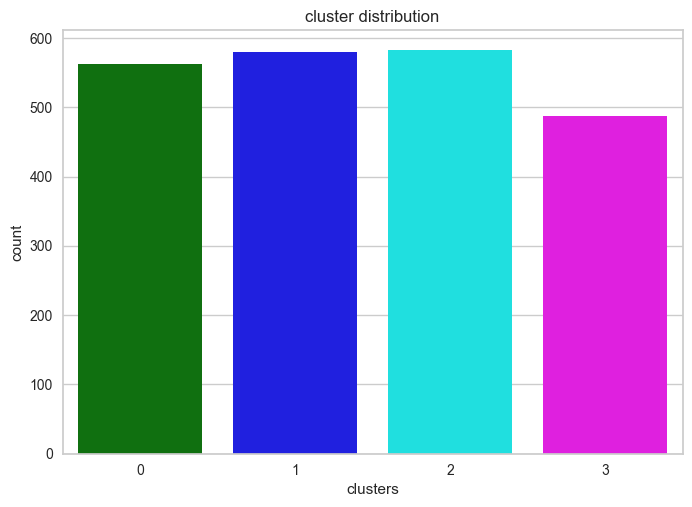

In [53]:
c_pl=sns.countplot(x=df["clusters"], palette=["Green","Blue","Cyan","Magenta"])
c_pl.set_title("cluster distribution")
plt.show()

In [26]:
#distribution of our clusters are normal

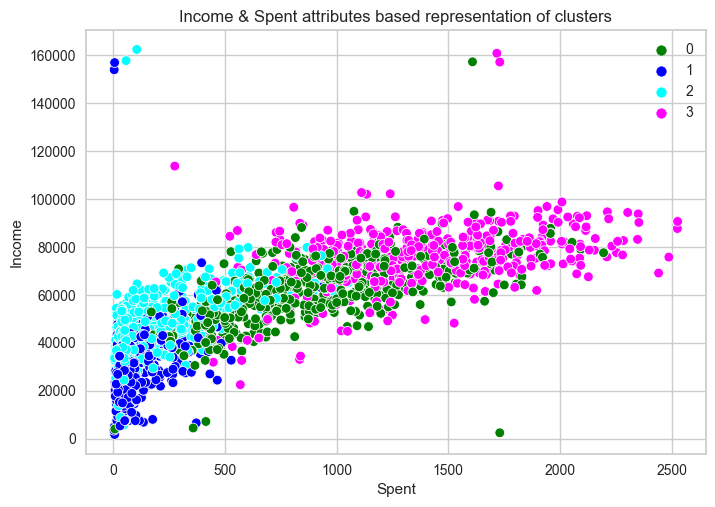

In [54]:
scat=sns.scatterplot(data=df, x=df["Spent"], y=df["Income"], hue=df["clusters"], palette=["Green", "Blue", "Cyan", "Magenta"])
scat.set_title("Income & Spent attributes based representation of clusters")
plt.legend()
plt.show()

In [27]:
#above scatterplot shows; 
    #group1 as high income as well as high spendings
    #group0 shows average income with high spendings
    #group3 shows low income with high spending
    #group2 shows both low income & spendings

In [28]:
#detailed distribution of clusters with respect to various product attributes in dataset

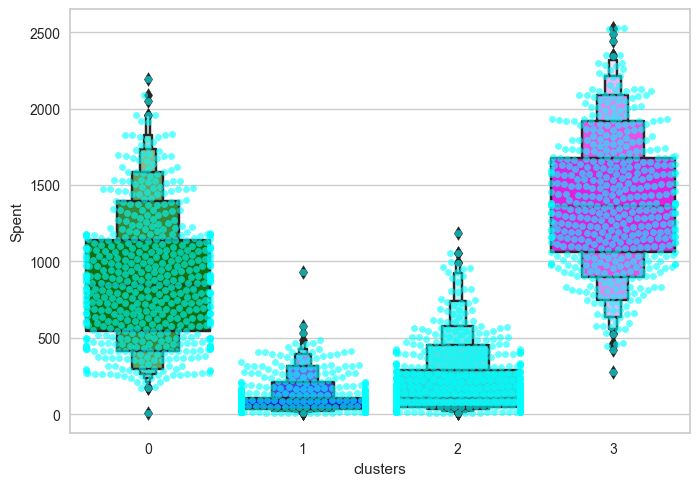

In [56]:
plt.figure()
plot=sns.swarmplot(x=df["clusters"], y=df["Spent"], color="Cyan", alpha=0.6)
plot=sns.boxenplot(x=df["clusters"], y=df["Spent"], palette=["Green", "Blue", "Cyan", "Magenta"])
plt.show()

In [29]:
#above plot tells us that cluster1 is biggest set of custoemrs, after that it is cluster0.

In [31]:
#to make some targeted marketing strategies, we will do exploration of each clusters to see what they are spending on.

In [32]:
#past campaigns performance exploration
    #creating an attribute to look over all campaigns of accepted promotions.

In [57]:
df["Total_Promos"]=df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]

In [ ]:
#plotting countplot of total accepted campaigns

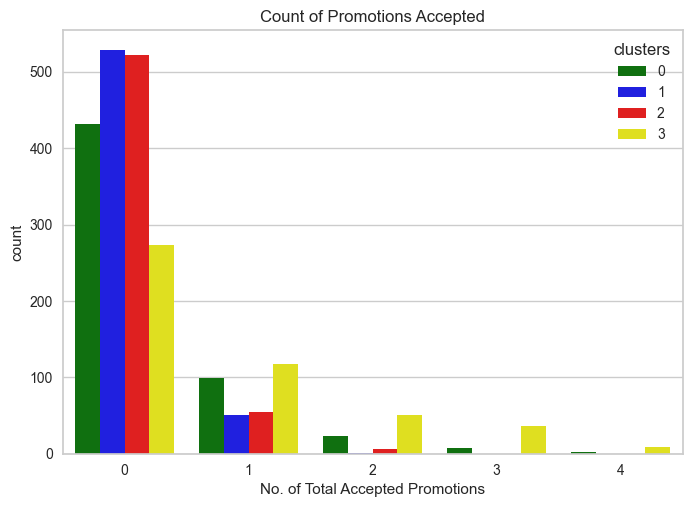

In [58]:
plt.figure()
cp=sns.countplot(x=df["Total_Promos"], hue=df["clusters"], palette=["Green","Blue","Red","Yellow"])
cp.set_title("Count of Promotions Accepted")
cp.set_xlabel("No. of Total Accepted Promotions")
plt.show()

In [33]:
#we can see that not one cluster of participants take part in all of the promotions, so we definitely need better planned and well targeted campaigns for boosting sales.

In [34]:
#now we will check which cluster of customers are attracted to purchase more on the deals .

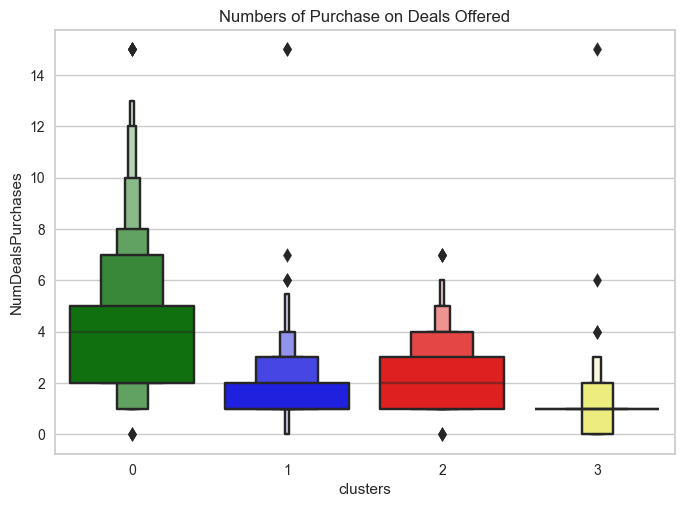

In [59]:
plt.figure()
box=sns.boxenplot(y=df["NumDealsPurchases"], x=df["clusters"], palette=["Green","Blue","Red","Yellow"])
box.set_title("Numbers of Purchase on Deals Offered")
plt.show()

as above can be seen, deals offered shows good reaction compared to promotions in our previous chart. group0 customers shows best outcome. and our important customer i.e; cluster1 (high income with high spendings) does not react much on the deals.

In [35]:
#observing purchasing style of customers using jointplot.

<Figure size 800x550 with 0 Axes>

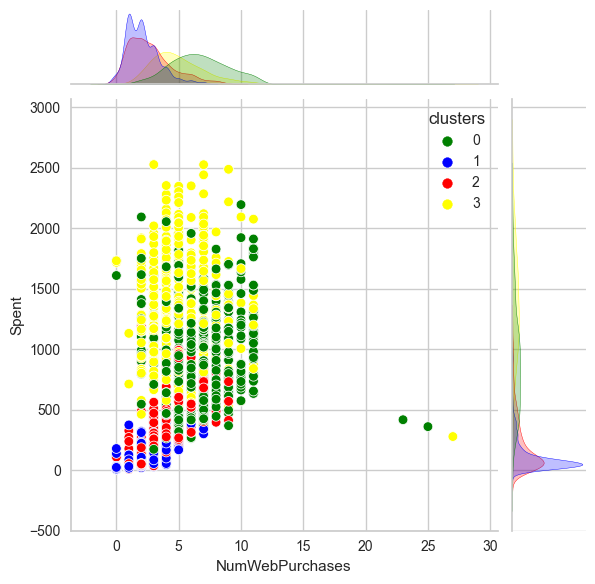

<Figure size 800x550 with 0 Axes>

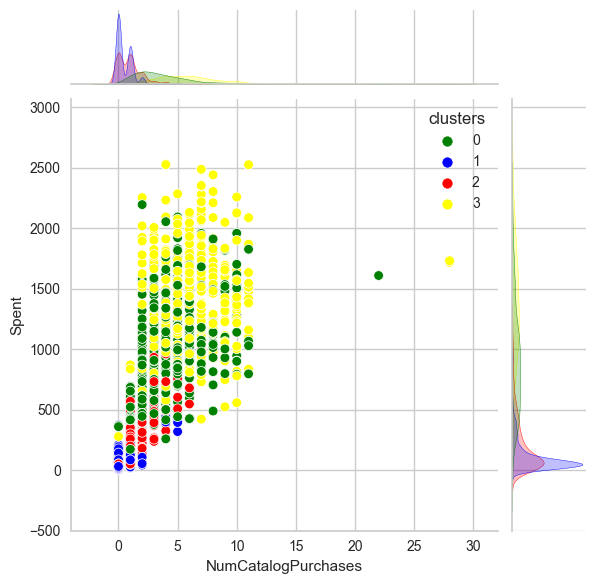

<Figure size 800x550 with 0 Axes>

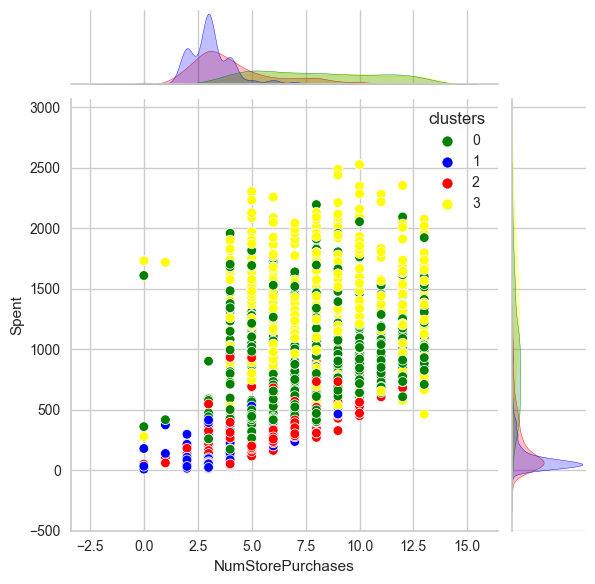

<Figure size 800x550 with 0 Axes>

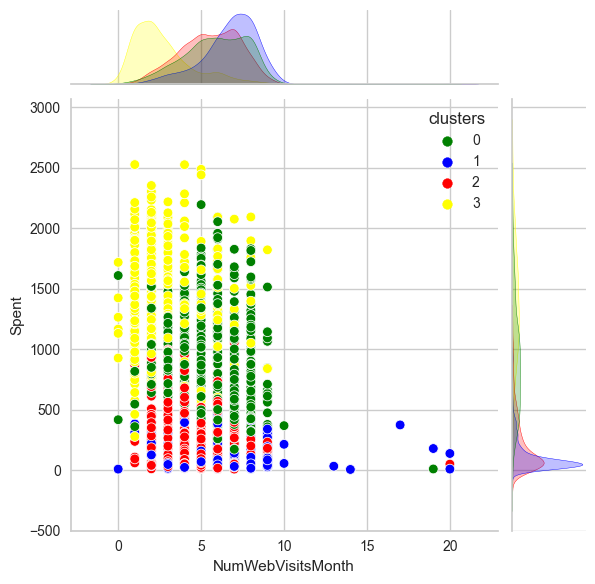

In [60]:
pur_style=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]
for i in pur_style:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue=df["clusters"], palette=["Green","Blue","Red","Yellow"])
    plt.show()

***DERIVING CONCLUSION***

In [36]:
#upto now we have looked at purchasing habits of each cluster of customers, 
#now we will see who are in these clusters exactly 
    #so that we can find out our best group of customers 
    #to give maximum attention to by the store's marketing management team. 

#we will do so by plotting few features which shows personal traits of customers in respective clusters.

<Figure size 800x550 with 0 Axes>

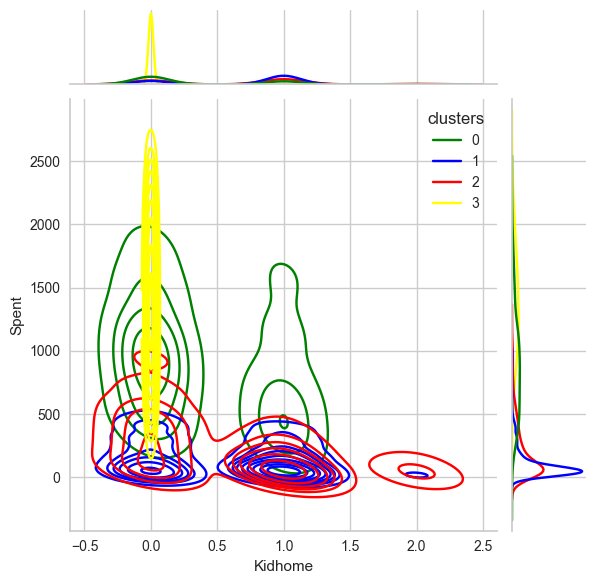

<Figure size 800x550 with 0 Axes>

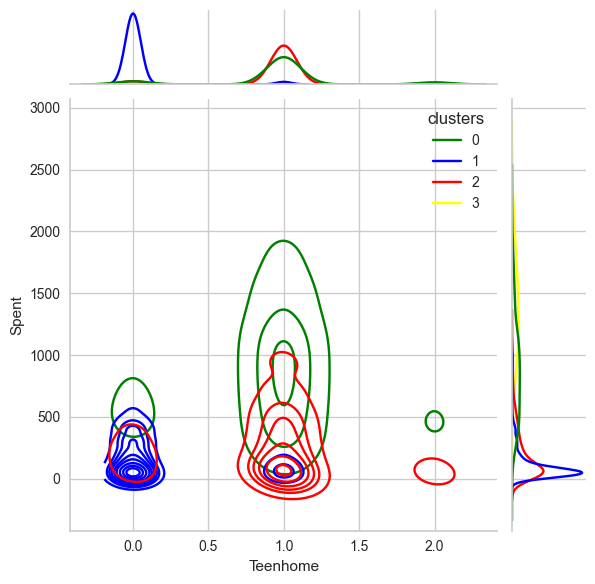

<Figure size 800x550 with 0 Axes>

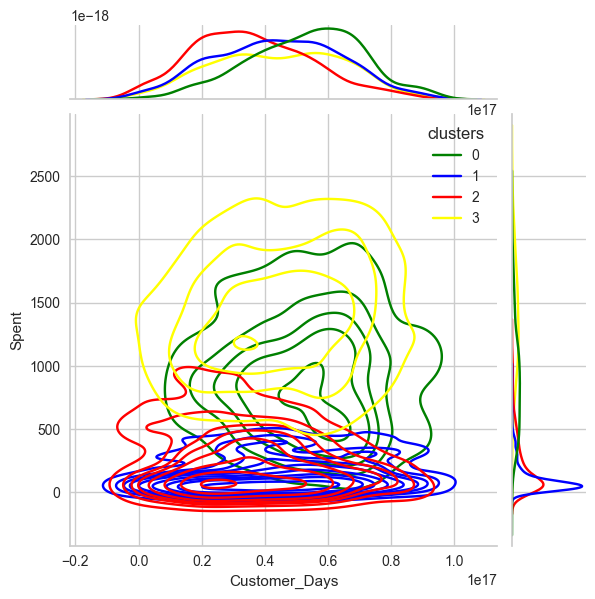

<Figure size 800x550 with 0 Axes>

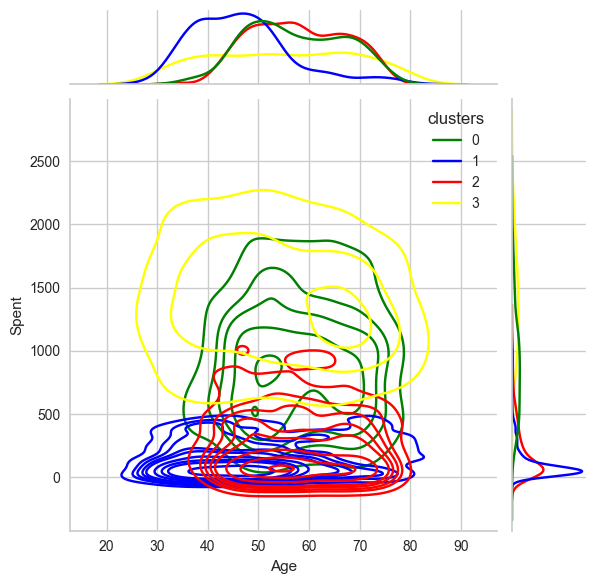

<Figure size 800x550 with 0 Axes>

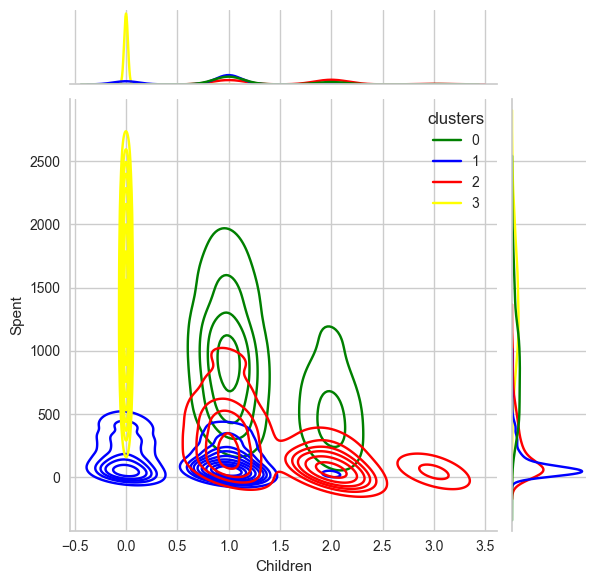

<Figure size 800x550 with 0 Axes>

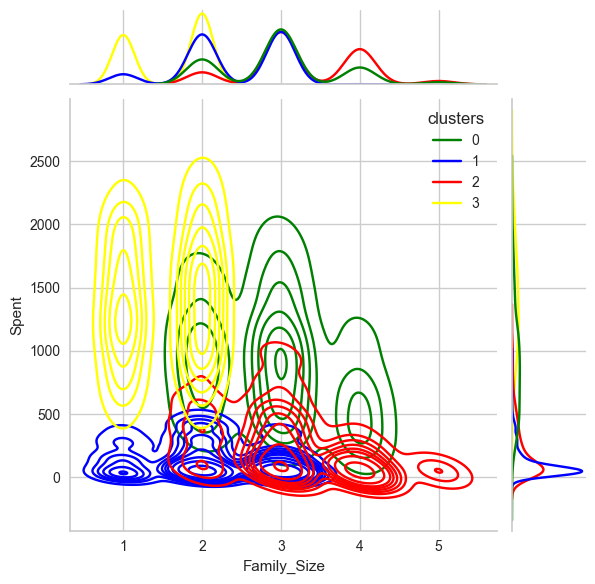

<Figure size 800x550 with 0 Axes>

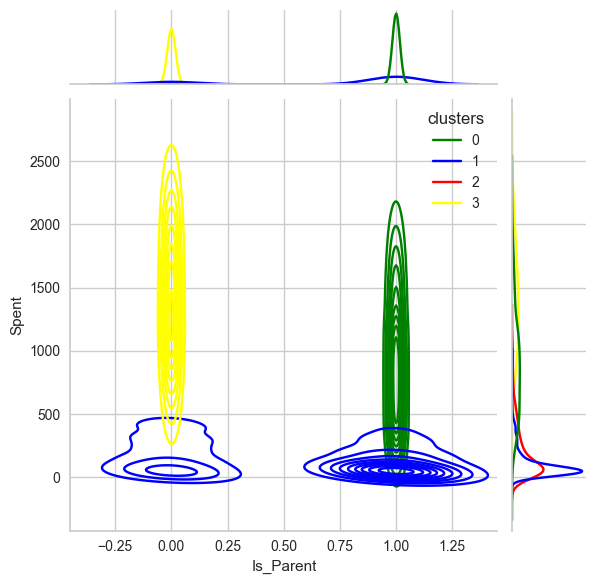

<Figure size 800x550 with 0 Axes>

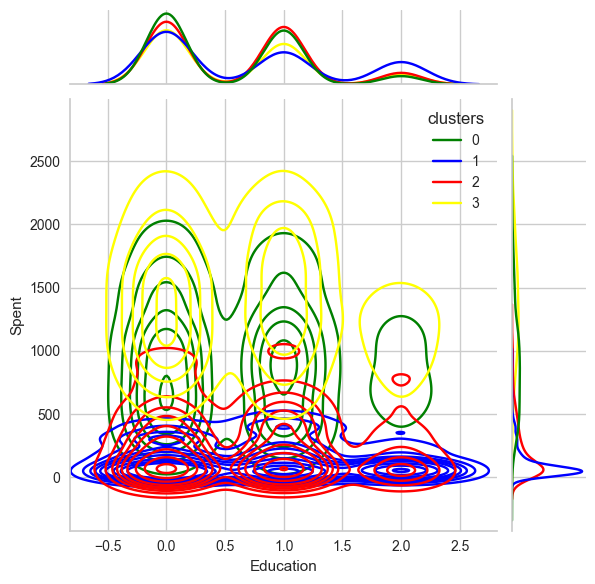

<Figure size 800x550 with 0 Axes>

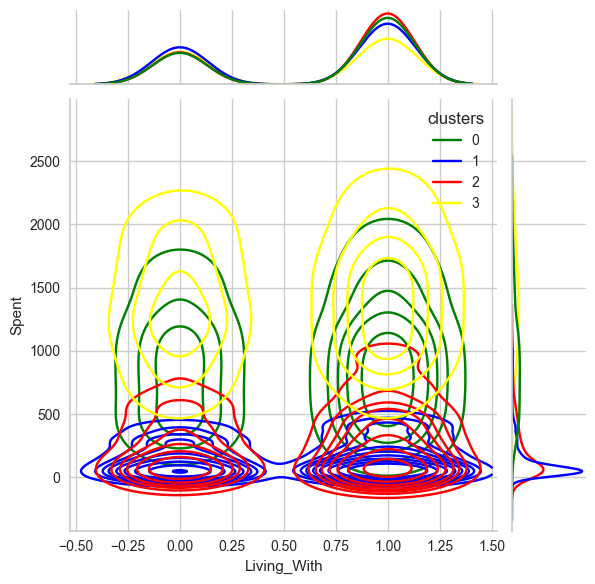

In [61]:
personal_inform=["Kidhome", "Teenhome", "Customer_Days", "Age", "Children", "Family_Size",
                 "Is_Parent", "Education", "Living_With"]
for i in personal_inform:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue=df["clusters"], kind="kde", palette=["Green", "Blue", "Red", "Yellow"])
    plt.show()

#Conclusion

In [37]:
#I came up with 4 clusters using Agglomerative Clustering 
#and later on used those clusters in segmenting customers on the basis of their 
    #family structure, 
    #income and 
    #spendings. 

#these analysis and segmentation can be used in further decision making for better marketing of this store.